# File I/O - Writing information to a file, or reading information from a file.

So far we have used `numpy` or `pandas` for files that are "nicely" formatted, but sometimes we need to read from or write to files by hand if the file format is more nuanced.

In [1]:
# Imports: glob is useful for file organization
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Make some test arrays and strings for later
xarr = np.arange(1, 11)
print(xarr)
yarr = np.random.randn(10)
print(yarr)
str1 = 'This is lecture 17.'
print(str1)
str2 = 'We are learning to read and write files.'
print(str2)

[ 1  2  3  4  5  6  7  8  9 10]
[-0.76526794  1.78245634 -0.23356891  0.2514873  -1.37517752  0.11045115
 -1.21628922  2.24035751  0.12035431 -0.96731575]
This is lecture 17.
We are learning to read and write files.


### In general, if we need to open the file, we need to provide the filename and the mode. 

The mode specifies whether we are reading, writing, or appending to the file. Furthermore, we can specify that we only want to write if the file does not already exist, or that we want to append to the end of the file that we open. 
* `fid = open(filename,mode)`
* `mode = 'r'` --> read
* `mode = 'w'` --> write
* `mode = 'x'` --> write, but only if file does not already exist
* `mode = 'a'` --> append 

In [3]:
# Example: opening a file for writing
fid = open('lecture17_test.txt', 'w')

### Close a file with `.close()`

It is best to always close a file after you are done working with it. This helps "protect" the file from corruption by other computer processes if a program happens to crash.

* `fid.close()`

In [4]:
# Let's close the file we just opened
fid.close()

### Write with `.write()`. Python writes strings to text files.
* `fid.write('some text')`

In [5]:
# Write the strings to a file
fid = open('lecture17_test1.txt', 'w')
fid.write(str1)
fid.write(str2)
fid.close()

In [6]:
# Add newline for each write statement
fid = open('lecture17_test2.txt', 'w')
fid.write(str1 + '\n')
fid.write(str2 + '\n')
fid.close()

### Write non-strings (or strings) using `print()`

In [7]:
# Printing strings to a file
fid = open('lecture17_test3.txt', 'w')
print(str1, file=fid)
print(str2, file=fid)
fid.close()

In [8]:
# Write the arrays to a file
fid = open('lecture17_test4.txt', 'w')
for a,b in zip(xarr,yarr):
    print(a,b,file=fid)
fid.close()

### String formatting details (just the basics - you can do a lot more!)

#### Floats: specifying number of digits to right of decimal
* For example, `'{:8.3f}'` will have a minimum field width of 8 and 3 digits to right of decimal
* Note that field width includes the decimal and is a minimum - Python will exceed if needed!

In [9]:
# print formatting
for a in yarr:
    print('{:5.1f} {:7.3f}'.format(a, a))

 -0.8  -0.765
  1.8   1.782
 -0.2  -0.234
  0.3   0.251
 -1.4  -1.375
  0.1   0.110
 -1.2  -1.216
  2.2   2.240
  0.1   0.120
 -1.0  -0.967


In [10]:
# float formatting
for a in yarr:
    print('{:4.2f} {:4.6f}'.format(a, a))

-0.77 -0.765268
1.78 1.782456
-0.23 -0.233569
0.25 0.251487
-1.38 -1.375178
0.11 0.110451
-1.22 -1.216289
2.24 2.240358
0.12 0.120354
-0.97 -0.967316


In [11]:
# float formatting
for a in yarr:
    print('{:5.1f} | {:7.3f}'.format(a, a))

 -0.8 |  -0.765
  1.8 |   1.782
 -0.2 |  -0.234
  0.3 |   0.251
 -1.4 |  -1.375
  0.1 |   0.110
 -1.2 |  -1.216
  2.2 |   2.240
  0.1 |   0.120
 -1.0 |  -0.967


#### Formatting integers - use d to specify minimum field width
* For example, `{:7d}` minumum field length 7

**Note that field width is a minimum - Python will exceed if needed!

In [12]:
# integer formatting
for a in xarr:
    print('{:3d} {:5d}'.format(a, a))

  1     1
  2     2
  3     3
  4     4
  5     5
  6     6
  7     7
  8     8
  9     9
 10    10


In [13]:
# pad with zeros
for a in xarr:
    print('{:03d} {:05d}'.format(a, a))

001 00001
002 00002
003 00003
004 00004
005 00005
006 00006
007 00007
008 00008
009 00009
010 00010


#### Formatting strings - use `':Xs'` to specify minimum field width of X

In [14]:
# string formatting
print('{:4s} {:4s} {:4s}'.format('cat', 'dog', 'bear'))
print('{:6s} {:8s} {:4s}'.format('cat', 'dog', 'bear'))

cat  dog  bear
cat    dog      bear


### Format when writing to file using string formatting

In [15]:
# when writing to a file, we need to put the linebreaks in: '\n'
fid = open('lecture17_test5.txt', 'w')
for a,b in zip(xarr, yarr):
    fid.write('{:4d} {:7.3f}\n'.format(a, b)) # notice \n
fid.close()

### Read a text file with `read()`, `readline()`, or `readlines()`
* `read()` - read all lines and place in a single string
* `readlines()` - read all lines and place in a list with each line an element of the list
* `readline()` - read one line and place in a string

In [16]:
# readlines(): makes a list
fid = open('lecture17_test3.txt', 'r')
text_readlines = fid.readlines()
fid.close()
text_readlines

['This is lecture 17.\n', 'We are learning to read and write files.\n']

In [17]:
# read(): one long string
fid = open('lecture17_test3.txt', 'r')
text_read = fid.read()
fid.close()
text_read

'This is lecture 17.\nWe are learning to read and write files.\n'

In [18]:
# readline(): one at a time
fid=open('lecture17_test3.txt', 'r')
line0 = fid.readline()
print(line0)
line1 = fid.readline()
print(line1)
fid.close()

line1 # note the line breaks

This is lecture 17.

We are learning to read and write files.



'We are learning to read and write files.\n'

### Remember - we can remove the newline characters with `.replace('\n', '')`

In [19]:
# loop over all lines, removing newline characters
print(text_readlines)
for i,val in enumerate(text_readlines):
    text_readlines[i] = val.replace('\n', '')
print(text_readlines)

['This is lecture 17.\n', 'We are learning to read and write files.\n']
['This is lecture 17.', 'We are learning to read and write files.']


### Automatically close files using `with open`

This syntax is recommened so we don't have to remember to `close()`

`with open('filename', 'r') as f:`

    # do stuff

In [20]:
# read all lines
with open('lecture17_test3.txt', 'r') as fid:
    text_readlines2 = fid.readlines()
text_readlines2    

['This is lecture 17.\n', 'We are learning to read and write files.\n']

In [21]:
# write to file
with open('lecture17_test6.txt', 'w') as fid:
    for a, b in zip(xarr, yarr):
        fid.write('{:4d} {:7.3f}\n'.format(a, b))

### Example: reading words from a file

In [22]:
# read lines into a word list
with open('lecture17_test3.txt', "r") as fid:
    word_list = fid.read().replace('.', '').split()
print(word_list)

['This', 'is', 'lecture', '17', 'We', 'are', 'learning', 'to', 'read', 'and', 'write', 'files']


### Note: If text doesn't read correctly try using `encoding="utf8"`, `"utf-8-sig"`, or `"ISO-8859-1"`
* This helps with special characters, and the performance might depend on your operating system.

In [23]:
# Specify encoding
with open('lecture17_Hamlet_german.txt', 'r', encoding="utf8") as fid:
    word_list = fid.read().replace('.', '').split()
print(word_list[:20])

['Hamlet,', 'Prinz', 'von', 'Dännemark', 'William', 'Shakespeare', 'Übersetzt', 'von', 'Christoph', 'Martin', 'Wieland', 'Ein', 'Trauerspiel', 'Personen', 'Claudius,', 'König', 'in', 'Dännemark', 'Fortinbras,', 'Prinz']


### Check if a file exists using os module
* `os.path.exists(filename)`

In [24]:
# will return True or False
os.path.exists('lecture17_Hamlet_german.txt')

True

### List the contents of a directory using `os.listdir()`

In [25]:
# '.' is the directory you are sitting in 
os.listdir('.')

['Lecture05_loops.ipynb',
 'Lecture11_numpy2.ipynb',
 'lecture14_athletes_men400m_bmi.csv',
 'lecture12_interface2.txt',
 'lecture15_parking.csv',
 'lecture14_athletes_men400m.csv',
 'lecture12_interface1.txt',
 '.DS_Store',
 'Lecture12_advanced_loops.ipynb',
 'Lecture02_variables.ipynb',
 'lecture17_s2016AMATRI01PIZZ.mat',
 'Lecture04_if_elif_else.ipynb',
 'Lecture14_pandas1.ipynb',
 'lecture13_topo_gom.grd',
 'Lecture07_modules_dictionaries.ipynb',
 'Lecture09_matplotlib1.ipynb',
 'Lecture08_strings.ipynb',
 'Lecture03_lists.ipynb',
 'lecture13_topo_scotiasea.grd',
 'lecture18_london1.csv',
 'Lecture10_numpy1.ipynb',
 'Lecture13_matplotlib2.ipynb',
 '__pycache__',
 'lecture09_fig2.png',
 'lecture09_fig1.pdf',
 'Lecture06_functions.ipynb',
 'lecture16-ridgecrest-earthquakes.txt',
 'Lecture15_pandas2.ipynb',
 'lecture17_Hamlet_german.txt',
 'lecture18_data_subset.txt',
 'lecture07_functions.py',
 'Lecture18_scipy.ipynb',
 'lecture17_test4.txt',
 'Lecture17_fileio.ipynb',
 'lecture17_te

In [26]:
# sort files by name
sorted(os.listdir('.'))

['.DS_Store',
 'Lecture02_variables.ipynb',
 'Lecture03_lists.ipynb',
 'Lecture04_if_elif_else.ipynb',
 'Lecture05_loops.ipynb',
 'Lecture06_functions.ipynb',
 'Lecture07_modules_dictionaries.ipynb',
 'Lecture08_strings.ipynb',
 'Lecture09_matplotlib1.ipynb',
 'Lecture10_numpy1.ipynb',
 'Lecture11_numpy2.ipynb',
 'Lecture12_advanced_loops.ipynb',
 'Lecture13_matplotlib2.ipynb',
 'Lecture14_pandas1.ipynb',
 'Lecture15_pandas2.ipynb',
 'Lecture16_pandas3.ipynb',
 'Lecture17_fileio.ipynb',
 'Lecture18_scipy.ipynb',
 '__pycache__',
 'lecture07_functions.py',
 'lecture07_test.py',
 'lecture09_fig1.pdf',
 'lecture09_fig2.png',
 'lecture11_input1.txt',
 'lecture11_input2.txt',
 'lecture11_precipitation.csv',
 'lecture12_grid.txt',
 'lecture12_interface1.txt',
 'lecture12_interface2.txt',
 'lecture13_topo_gom.grd',
 'lecture13_topo_scotiasea.grd',
 'lecture14_athletes_men400m.csv',
 'lecture14_athletes_men400m_bmi.csv',
 'lecture15_athletes_women400m.csv',
 'lecture15_parking.csv',
 'lecture15

In [27]:
# Print all the files in the directory with a '.txt' extension
for file in sorted(os.listdir('.')):
    if file.endswith(".txt"):
        print(file)

lecture11_input1.txt
lecture11_input2.txt
lecture12_grid.txt
lecture12_interface1.txt
lecture12_interface2.txt
lecture16-ridgecrest-earthquakes.txt
lecture17_Hamlet_german.txt
lecture17_test.txt
lecture17_test1.txt
lecture17_test2.txt
lecture17_test3.txt
lecture17_test4.txt
lecture17_test5.txt
lecture17_test6.txt
lecture18_data_subset.txt


### `glob` is a bit more powerful, but includes the relative path

In [28]:
# find all files in current directory ending in .txt
for file in glob.glob("./*.txt"): # can put in "wildcards"
    print(file)

./lecture12_interface2.txt
./lecture12_interface1.txt
./lecture16-ridgecrest-earthquakes.txt
./lecture17_Hamlet_german.txt
./lecture18_data_subset.txt
./lecture17_test4.txt
./lecture17_test5.txt
./lecture12_grid.txt
./lecture17_test6.txt
./lecture17_test2.txt
./lecture11_input1.txt
./lecture17_test3.txt
./lecture17_test1.txt
./lecture11_input2.txt
./lecture17_test.txt


In [29]:
# this strips off filepath, leaving only the name
for file in glob.glob("./*.txt"): # can put in "wildcards"
    print(file.split("/")[-1])

lecture12_interface2.txt
lecture12_interface1.txt
lecture16-ridgecrest-earthquakes.txt
lecture17_Hamlet_german.txt
lecture18_data_subset.txt
lecture17_test4.txt
lecture17_test5.txt
lecture12_grid.txt
lecture17_test6.txt
lecture17_test2.txt
lecture11_input1.txt
lecture17_test3.txt
lecture17_test1.txt
lecture11_input2.txt
lecture17_test.txt


### Saving `arrays`: `np.save(...)` and `np.savez(...)`

It is not required, but the convention is to save as a ".npy" file.

In [30]:
# save arrays to a file: np.save() 
print("Saving:\n", xarr)
np.save("lecture17_xarr.npy", xarr)
print("Saving:\n", yarr)
np.save("lecture17_yarr.npy", yarr)

Saving:
 [ 1  2  3  4  5  6  7  8  9 10]
Saving:
 [-0.76526794  1.78245634 -0.23356891  0.2514873  -1.37517752  0.11045115
 -1.21628922  2.24035751  0.12035431 -0.96731575]


In [31]:
# see if we did ok: np.load()
xarr2 = np.load("lecture17_xarr.npy")
print(xarr2)
# see if we did ok
yarr2 = np.load("lecture17_yarr.npy")
print(yarr2)

[ 1  2  3  4  5  6  7  8  9 10]
[-0.76526794  1.78245634 -0.23356891  0.2514873  -1.37517752  0.11045115
 -1.21628922  2.24035751  0.12035431 -0.96731575]


In [32]:
# save multiple arrays with np.savez()
print("Saving two arrays...")
np.savez("lecture17_xyarr.npz", xx=xarr, yy=yarr)

# load them with np.load(...)
print("Loading them back...")
data = np.load("lecture17_xyarr.npz")

# results are stored in x and y
print(data["xx"])
print(data["yy"])

Saving two arrays...
Loading them back...
[ 1  2  3  4  5  6  7  8  9 10]
[-0.76526794  1.78245634 -0.23356891  0.2514873  -1.37517752  0.11045115
 -1.21628922  2.24035751  0.12035431 -0.96731575]


### Loading Matlab files

I am not a Matlab person, but often deal with them (you troublemakers know who you are!). 

In any case, it is useful to know how to load Matlab files into Python. Here we use `loadmat` from `scipy.io`. 

In this example, we will load a fault model of an earthquake from the SRCMOD database (http://equake-rc.info/srcmod/).

In [33]:
## use loadmat for easy I/O
from scipy.io import loadmat

## load model
model_name = "s2016AMATRI01PIZZ"
mdata = loadmat("lecture17_" + model_name + ".mat", simplify_cells=True)
print(mdata)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Mar  7 07:54:02 2020', '__version__': '1.0', '__globals__': [], 's2016AMATRI01PIZZ': {'srcAveTr': -99.0, 'invNsta': array([20,  0,  0,  0,  0,  0,  0,  0]), 'invREF': 'Pizzi, A., A. Di Domenica, F. Gallovič, L. Luzi, and R. Puglia (2017). Fault segmentation as constraint to the occurrence of the main shocks of the 2016 Central Italy seismic sequence, Tectonics, 36, doi: 10.1002/2017TC004652.', 'invVstr': array([[  0.  ,   3.  ,   1.7 ,   2.5 , 200.  , 100.  ],
       [  1.  ,   4.83,   2.6 ,   2.84, 400.  , 200.  ],
       [  2.  ,   5.76,   3.1 ,   2.94, 400.  , 200.  ],
       [  5.  ,   6.51,   3.5 ,   3.15, 400.  , 200.  ],
       [ 27.  ,   7.  ,   3.8 ,   3.26, 600.  , 300.  ],
       [ 42.  ,   7.8 ,   4.2 ,   3.5 , 800.  , 400.  ]]), 'srcMwMoS': array([6.21e+00, 2.60e+18]), 'srcAStke': 155.0, 'rakeTW11': array([[-85., -85., -85., -85., -85., -85., -85., -85., -85., -85., -85.,
        -85., -85., -85., -85., 

Much of the information below is metadata about the file. We want the actual data, which we can extract as below.

In [34]:
## load model
model_name = "s2016AMATRI01PIZZ"
mdata = loadmat("lecture17_" + model_name + ".mat", simplify_cells=True)
smod = mdata[model_name] # only want this field of the dictionary

## print out event information
print("Event:", smod['event'])
print("Reference:", smod['invAUTH'])
print("Event date:", smod['evDAT'])
print("Mw and M0:", smod['srcMwMoS'])

## Fault geometry
nseg = int(smod['invSEGM'])
print("Number of segments:", nseg)
print("Nz and Nx:", smod['invNzNx'])
print("dz and dx:", smod['invDzDx'])

## Peak slip, likely in cm
peak_slip = np.max(smod['slipSPL'])
print("Peak slip [cm]:", peak_slip)

Event: Amatrice 
Reference: Pizzi et al. (2017) 
Event date: 08/24/2016
Mw and M0: [6.21e+00 2.60e+18]
Number of segments: 1
Nz and Nx: [12. 30.]
dz and dx: [1.  1.2]
Peak slip [cm]: 49.669999999999995


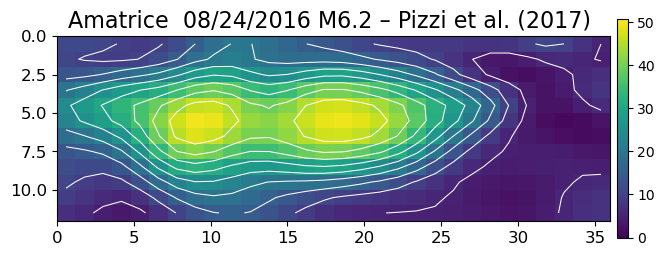

In [35]:
### Advanced Plotting Example...

## figure setup
fig, axi = plt.subplots(1,1,figsize=(8.5,8.5))

# extract geometry
nz, nx = int(smod['invNzNx'][0]), int(smod['invNzNx'][1])
dz, dx = smod['invDzDx']
xx = np.arange(0, nx*dx+dx/10, dx)
zz = np.arange(0, nz*dz+dz/10, dz)
aspect = zz[-1] / xx[-1]

# plot slip model
peak_slip = np.max(smod['slipSPL'])
h = axi.pcolormesh(xx, zz, smod['slipSPL'], vmin=0, vmax=peak_slip+1)

# slip contours
xxc = xx[0:-1]+dx/2
zzc = zz[0:-1]+dz/2
peak_slip = np.max(smod['slipSPL'])
levels = np.linspace(0, peak_slip, 11)
axi.contour(xxc, zzc, smod['slipSPL'], levels=levels, colors='w', linewidths=0.75)

# title
ttlstr = '{:} {:} M{:.1f} – {:}'.format(
   smod['event'], smod['evDAT'], smod['srcMwMoS'][0], smod['invAUTH'])
axi.set_title(ttlstr, fontsize=16)

# format
axi.set_ylim(zz[-1],zz[0])
cb = plt.colorbar(h, ax=axi, shrink=aspect, pad=0.01)
axi.set_aspect('equal')
axi.tick_params(labelsize=12)

# show plot
plt.show()
plt.close()

# Summary
* File input/output (I/O) is a fundamental python skill.
* For text files, we open files in read or write mode and then read or write lines.
* Remember to close the file when you are done, or use `with open(...)`
* Formatting strings are helpful for printing numerical data.
* The modules `os` and `glob` can be used to traverse file trees.
* We can read and write `numpy` arrays directly: `np.save()`, `np.savez()`, `np.load()`.
* We can read Matlab files with `loadmat` from `scipy.io`.